In [1]:
using Plots

In [19]:
hs = [0.01, 0.001]
errors = []
xxs = []
vns = []
for hval in hs
eta = 1;
h = hval * pi;
k = 0.5*h;
mu = k / h;

    
    
xx = [-pi + i * h for i=0:2000]
Jp2 = length(xx)
Jp1 = Jp2 - 1
J = Jp1 - 1

 
nsteps = floor(1 / k)
#nsteps = 60
tf = k * nsteps

un = [sin(x * eta) for x in xx];

ue = [sin(eta * (x + tf)) for x in xx];

vo = un;

vn = [sin(eta * (k+x)) for x in xx];
  
for i in 2:nsteps
    voo = copy(vo)
    vo = copy(vn)
    vn[2:Jp1] = voo[2:Jp1] + mu * (vo[3:Jp2] - vo[1:J])
    vn[1] = voo[1] + mu * (vo[2] - vo[Jp1])
    vn[Jp2] = vn[1];
end
   
err3 = [abs(vn[x] - ue[x]) for x=1:length(vn)];
error = maximum(err3)
    
append!(errors, error)
append!(vns, vn)
append!(xxs, xx)

end


Do more testing on the scope of variables. I believe the scope of a variable within a loop here is only within the loop and not a global scope. Example when looping for hvals xx and vn can no longer be plotted as they arent defined outside the scope of the loop. Inconvenient solve is creating an array outside the loop and appending within the loop

In [22]:
vns

4002-element Vector{Any}:
 -0.8357413865485517
 -0.8525774268306079
 -0.8685720761253104
 -0.8837095496448462
 -0.8979749085304285
 -0.9113540745951207
 -0.9238338442173004
 -0.9354019013710383
 -0.9460468297805735
 -0.9557581241867312
 -0.96452620071439
 -0.9723424063306066
 -0.9791990273840951
  ⋮
 -0.8217457063383136
 -0.8235318985173057
 -0.8253099627689326
 -0.8270798815444191
 -0.8288416373753813
 -0.8305952128739982
 -0.8323405907331884
 -0.8340777537267775
 -0.8358066847096696
 -0.8375273666180116
 -0.8392397824693689
 -0.8409439153628878

In [3]:
errors

2-element Vector{Any}:
 0.00012149521739387645
 1.2311311897105458e-6

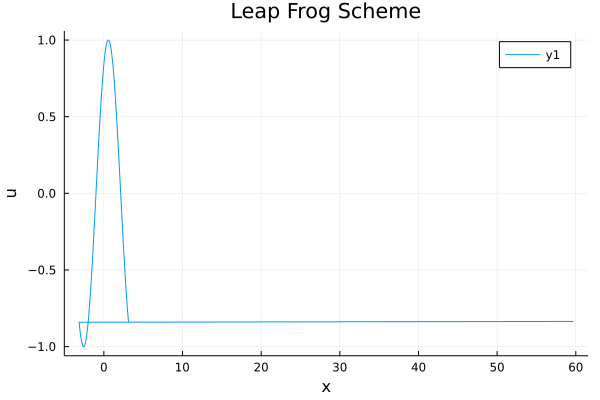

In [25]:
plot(xxs[2001:4002], vns[2001:4002])
xlabel!("x")
ylabel!("u")
title!("Leap Frog Scheme")

In [6]:
test = [1, 2 ,3 ]

3-element Vector{Int64}:
 1
 2
 3

In [7]:
test = [4, 5, 6]

3-element Vector{Int64}:
 4
 5
 6

In [8]:
test

3-element Vector{Int64}:
 4
 5
 6